# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [130]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
#from api_keys import api_key
api_key = "2d2d4b9744f8963d9de7bf3295f86acf"
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output_data_charts/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

In [25]:
cities_dict = {
    "city": cities}

cities_df = pd.DataFrame(cities_dict)
cities_df.head()

,city
0,langsa
1,suntar
2,illoqqortoormiut
3,puerto ayora
4,srednekolymsk


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [131]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=2d2d4b9744f8963d9de7bf3295f86acf&units=imperial&q='

In [132]:
#Testing API call
qaanaaq_response = requests.get(query_url + "qaanaaq").json()
qaanaaq_response

{'coord': {'lon': -69.36, 'lat': 77.48},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'model',
 'main': {'temp': 4.05,
  'pressure': 977,
  'humidity': 62,
  'temp_min': 4.05,
  'temp_max': 4.05,
  'sea_level': 977,
  'grnd_level': 937},
 'wind': {'speed': 8.01, 'deg': 68},
 'clouds': {'all': 100},
 'dt': 1575341883,
 'sys': {'country': 'GL', 'sunrise': 0, 'sunset': 0},
 'timezone': -14400,
 'id': 3831208,
 'name': 'Qaanaaq',
 'cod': 200}

In [136]:
lat = []
max_temp = []
hum = []
clouds = []
wind = []
counter = 1

for city in cities:
    #Print city log
    print(f'Processing City # {counter} | {city}')
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        max_temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed']) 
       
        counter += 1 
    
    except KeyError:
        #Print if data not found to log
        print("Pass on errors, skip record")
        continue
    
        

Processing City # 1 | langsa
Processing City # 2 | suntar
Processing City # 3 | illoqqortoormiut
Pass on errors, skip record
Processing City # 3 | puerto ayora
Processing City # 4 | srednekolymsk
Processing City # 5 | rikitea
Processing City # 6 | half moon bay
Processing City # 7 | katsuura
Processing City # 8 | chapais
Processing City # 9 | tuktoyaktuk
Processing City # 10 | egvekinot
Processing City # 11 | nizwa
Processing City # 12 | albany
Processing City # 13 | chagda
Pass on errors, skip record
Processing City # 13 | sedelnikovo
Pass on errors, skip record
Processing City # 13 | mataura
Processing City # 14 | saldanha
Processing City # 15 | hermanus
Processing City # 16 | morant bay
Processing City # 17 | kodiak
Processing City # 18 | ushuaia
Processing City # 19 | saint george
Processing City # 20 | banda aceh
Processing City # 21 | waipawa
Processing City # 22 | taolanaro
Pass on errors, skip record
Processing City # 22 | avera
Processing City # 23 | tasiilaq
Processing City #

Processing City # 212 | duku
Processing City # 213 | kamenskoye
Pass on errors, skip record
Processing City # 213 | serebryansk
Processing City # 214 | paredon
Processing City # 215 | ramsar
Processing City # 216 | tual
Processing City # 217 | missoula
Processing City # 218 | portobelo
Processing City # 219 | blagoyevo
Processing City # 220 | broome
Processing City # 221 | yellowknife
Processing City # 222 | quatre cocos
Processing City # 223 | viligili
Pass on errors, skip record
Processing City # 223 | kumluca
Processing City # 224 | tomaszow lubelski
Processing City # 225 | sitka
Processing City # 226 | hamilton
Processing City # 227 | warqla
Pass on errors, skip record
Processing City # 227 | zelenogorskiy
Processing City # 228 | halifax
Processing City # 229 | shchelyayur
Pass on errors, skip record
Processing City # 229 | telfs
Processing City # 230 | beringovskiy
Processing City # 231 | labuan
Processing City # 232 | olafsvik
Pass on errors, skip record
Processing City # 232 | s

Processing City # 412 | tumannyy
Pass on errors, skip record
Processing City # 412 | liuzhou
Processing City # 413 | tuatapere
Processing City # 414 | mahadday weyne
Pass on errors, skip record
Processing City # 414 | khalkhal
Processing City # 415 | college
Processing City # 416 | portland
Processing City # 417 | batagay-alyta
Processing City # 418 | celestun
Processing City # 419 | los llanos de aridane
Processing City # 420 | pevek
Processing City # 421 | nevsehir
Processing City # 422 | hammerfest
Processing City # 423 | flin flon
Processing City # 424 | ampanihy
Processing City # 425 | stephenville crossing
Processing City # 426 | nadym
Processing City # 427 | praya
Processing City # 428 | axim
Processing City # 429 | buluang
Processing City # 430 | bandarbeyla
Processing City # 431 | vila
Processing City # 432 | la rioja
Processing City # 433 | ferme-neuve
Processing City # 434 | mamlyutka
Processing City # 435 | gizo
Processing City # 436 | rungata
Pass on errors, skip record
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [137]:
weather_dict = {
    "city": cities,
    "lat": lat,
    "max temp": max_temp,"humidity": hum,
    "clouds": clouds, "wind": wind
}
#Convert to to dataframe


df = pd.DataFrame.from_dict(weather_dict, orient='index')

transposed_df = df.transpose()
transposed_df.reset_index()


#weather_data

,index,city,lat,max temp,humidity,clouds,wind
0,0,langsa,4.47,82.8,81,92,2.86
1,1,suntar,62.16,-32.55,93,10,2.28
2,2,illoqqortoormiut,-0.74,71.01,91,18,4
3,3,puerto ayora,67.46,-30.68,94,73,8.3
4,4,srednekolymsk,-23.12,75.56,84,91,13.49
...,...,...,...,...,...,...,...
593,593,san julian,None,None,None,None,None
594,594,hofn,None,None,None,None,None
595,595,qaqortoq,None,None,None,None,None
596,596,jalu,None,None,None,None,None


In [138]:
#Convert None to number 
transposed_df['lat'] = pd.to_numeric(transposed_df['lat'])
transposed_df['max temp'] = pd.to_numeric(transposed_df['max temp'])
transposed_df['humidity'] = pd.to_numeric(transposed_df['humidity'])
transposed_df['clouds'] = pd.to_numeric(transposed_df['clouds'])
transposed_df['wind'] = pd.to_numeric(transposed_df['wind'])

transposed_df.to_csv(output_data_file)

transposed_df.head()

,city,lat,max temp,humidity,clouds,wind
0,langsa,4.47,82.80,81.0,92.0,2.86
1,suntar,62.16,-32.55,93.0,10.0,2.28
2,illoqqortoormiut,-0.74,71.01,91.0,18.0,4.00
3,puerto ayora,67.46,-30.68,94.0,73.0,8.30
4,srednekolymsk,-23.12,75.56,84.0,91.0,13.49


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

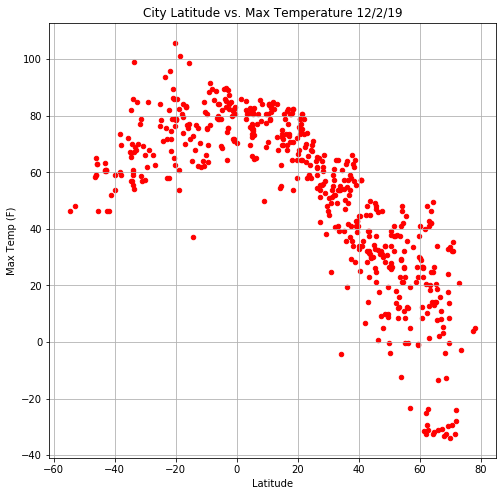

In [143]:
lat_temp_plt = transposed_df.plot(kind="scatter", x="lat", y="max temp", grid=True, figsize=(8,8),
              title="City Latitude vs. Max Temperature 12/2/19", color = "r")

lat_temp_plt.set_xlabel("Latitude")
lat_temp_plt.set_ylabel("Max Temp (F)")

plt.savefig('Output_data_charts/lat_temp_plt.png')
plt.show()

#### Latitude vs. Humidity Plot

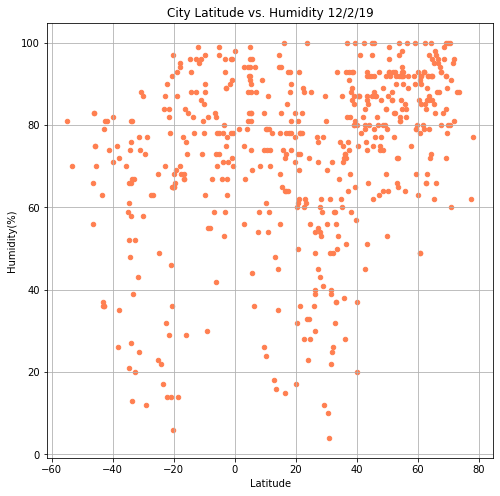

In [144]:
lat_hum_plt = transposed_df.plot(kind="scatter", x="lat", y="humidity", grid=True, figsize=(8,8),
              title="City Latitude vs. Humidity 12/2/19", color = "coral")

lat_hum_plt.set_xlabel("Latitude")
lat_hum_plt.set_ylabel("Humidity(%)")

plt.savefig('Output_data_charts/lat_hum_plt.png')
plt.show()

#### Latitude vs. Cloudiness Plot

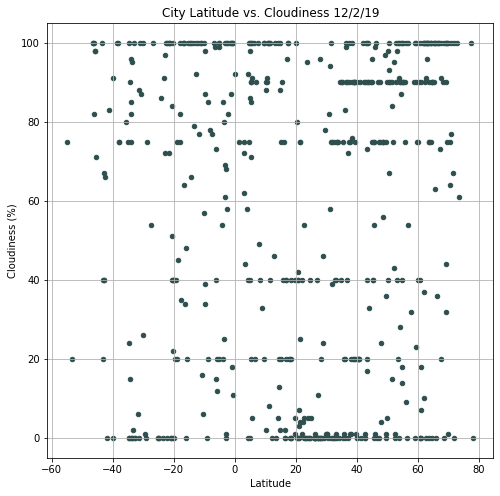

In [145]:
lat_cloud_plt = transposed_df.plot(kind="scatter", x="lat", y="clouds", grid=True, figsize=(8,8),
              title="City Latitude vs. Cloudiness 12/2/19", color = "darkslategrey")

lat_cloud_plt.set_xlabel("Latitude")
lat_cloud_plt.set_ylabel("Cloudiness (%)")

plt.savefig('Output_data_charts/lat_cloud_plt')
plt.show()

#### Latitude vs. Wind Speed Plot

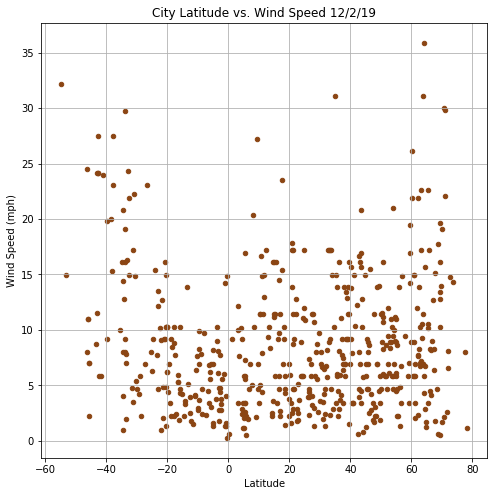

In [146]:
lat_wind_plt = transposed_df.plot(kind="scatter", x="lat", y="wind", grid=True, figsize=(8,8),
              title="City Latitude vs. Wind Speed 12/2/19", color = "saddlebrown")

lat_wind_plt.set_xlabel("Latitude")
lat_wind_plt.set_ylabel("Wind Speed (mph)")

plt.savefig('Output_data_charts/lat_wind_plt')
plt.show()